<a href="https://colab.research.google.com/github/yh08037/KNU-DeepLearning/blob/master/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrvie')

Drive already mounted at /content/gdrvie; to attempt to forcibly remount, call drive.mount("/content/gdrvie", force_remount=True).


# MLP Iris with Dataload

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn

# data loading from csv file
data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/Iris.csv', delimiter=',', unpack=True, dtype='float32')
data = np.transpose(data)
x_vals = np..array([x[0:3] for x in data])
y_vals = np..array([x[3] for x in data])

# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# Input Data Normalization (from -1 to 1)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# Model set-up
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)

H_nodes = 10

W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes]))

W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))

# loss and optimizer definition
#loss = tf.reduce_mean(tf.square(y_target - L_out))
loss = tf.nn.l2_loss(y_target - L_out)

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

# Running session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Create a saver object which will save all the variables
saver = tf.train.Saver()
loss_vec = []
test_loss = []

for i in range(2000):
    sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})

    temp_loss = sess.run(loss, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%100==0:
        print(i+1, temp_loss, test_temp_loss)
# Now, save the graph
saver.save(sess, '/content/gdrive/My Drive/Colab Notebooks/model/irisMLP', global_step=1000)

plt.plot(loss_vec, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()

(입력값 3개 / bias1) - W1 -(히든노드 10개 / bias2) - W2 - H -L

# MNIST CNN

Optical Charcter Recognition Problem


In [0]:
# Load the necessary package
## Packages and Data

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

## Load MNIST data

(x_train, y_train), (x_test, y_test) = load_data()

## Transform to 4-dim tensors

# print(x_train.shape)    # (60000, 28, 28)
x_train = np.expand_dims(x_train, axis=-1)   # axis=-1 : 텐서의 맨 뒤(인덱스:-1)를 expand
x_test = np.expand_dims(x_test, axis=-1)
# print(x_train.shape)    # (60000, 28, 28, 1)

## Normalization [0, 255] -> [0,1]
print(x_train.max())
x_train = x_train / 255
x_test = x_test / 255

# #Allocate placeholders for I/O
x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
y = tf.placeholder(tf.int64, shape=[None])

## Integer label -> Binary, one-hot label
y_onehot = tf.one_hot(y, 10)
print(y_onehot.shape)

## Dropout probability
keep_prob = tf.placeholder(tf.float32)

# Network Settin
## Convolution layer 1

# tf.truncated_normal : 2시그마 내의 정규분포
W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 64], stddev=5e-2)) 
# [5, 5, 1, 64] : 흑백이라서 1 => 컬러면 rgb 채널 3개 추가 : [5, 5, 4, 64]
b_conv1 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv1 = tf.nn.relu(tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


## Convolution layer 2
W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 64, 64], stddev=5e-2))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

## Fully connedted layer 1
W_fc1 = tf.Variable(tf.truncated_normal(shape=[7*7*64, 384], stddev=5e-2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[384]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob=keep_prob)

## Fully connected layer 2
W_fc2 = tf.Variable(tf.truncated_normal(shape=[384, 10], stddev=5e-2))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_pred = tf.nn.softmax(logits)

# LOSS AND OPTIMIZER
# Cross entropy loss with doftmax output
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_onehot, logits=logits))

# Adam optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

#Accuracy calculation
correct_prediction = tf.equal(tf.argmax(y_pred, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




# LEARGNING STEPS

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        idx = np.random.randint(x_train.shape[0], size=128)
        batch = (x_train[idx], y_train[idx])
        if i%100==0:
            train_accuracy = sess.run(accuracy, feed_dict={x:batch[0], y:batch[1], keep_prob:1.})
            loss_print = loss.eval(feed_dict={x:batch[0], y:batch[1], keep_prob:1.})
            print("step:%d, acc:%f, loss:%f" %(i, train_accuracy, loss_print))
        sess.run(train_step, feed_dict={x:batch[0], y:batch[1], keep_prob:0.5})
    test_accuracy = accuracy.eval({x:x_test, y:y_test, keep_prob:1.})
    print("test acc:%f" %test_accuracy)

255
(?, 10)
step:0, acc:0.093750, loss:2.485717
step:100, acc:0.820312, loss:0.744914
step:200, acc:0.929688, loss:0.275824
step:300, acc:0.921875, loss:0.310555
step:400, acc:0.953125, loss:0.225718
step:500, acc:0.968750, loss:0.170144
step:600, acc:0.945312, loss:0.162272
step:700, acc:0.953125, loss:0.154553
step:800, acc:0.968750, loss:0.099658
step:900, acc:0.945312, loss:0.157109
step:1000, acc:0.960938, loss:0.127328
step:1100, acc:0.976562, loss:0.080801
step:1200, acc:0.976562, loss:0.126921
step:1300, acc:0.960938, loss:0.132873
step:1400, acc:0.968750, loss:0.089056
step:1500, acc:0.960938, loss:0.112677
step:1600, acc:0.976562, loss:0.072304
step:1700, acc:0.945312, loss:0.144309
step:1800, acc:0.984375, loss:0.071153
step:1900, acc:0.984375, loss:0.034536
step:2000, acc:0.992188, loss:0.022598
step:2100, acc:0.976562, loss:0.071021
step:2200, acc:0.976562, loss:0.064937
step:2300, acc:0.968750, loss:0.075585
step:2400, acc:0.992188, loss:0.019639
step:2500, acc:0.984375, 

100 1.9038599 1.5223695
200 2.3970969 1.4801183
300 1.5154343 1.4146264
400 1.7011445 1.3044457
500 1.001856 1.1645528
600 1.0462993 1.0241177
700 1.017442 0.9563368
800 0.8885364 0.8897593
900 0.6829431 0.84433365
1000 0.62705755 0.81812173
1100 0.63753486 0.79594505
1200 0.56615984 0.7742299
1300 0.6056149 0.755236
1400 0.67628145 0.73503584
1500 0.45264977 0.7149006
1600 0.52555025 0.6927264
1700 0.6160445 0.67496145
1800 0.49978745 0.6579008
1900 0.40418094 0.6389786
2000 0.37275192 0.6217748


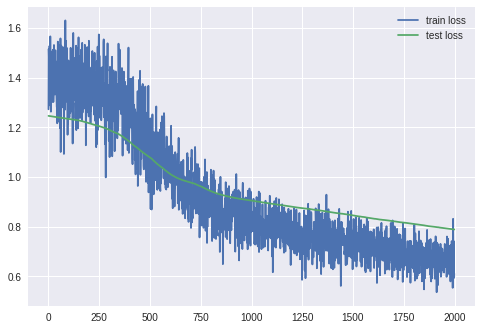

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
from sklearn import datasets
# data set_up
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data]) # input
y_vals = np.array([x[3] for x in iris.data]) # target_output
# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
# Input Data Normalization (from -1 to 1)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max - col_min)
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
# Model set-up
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)
H_nodes = 10
batch_size = 50
W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes]))
W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))
H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))
# loss and optimizer definition
loss = tf.reduce_mean(tf.square(y_target - L_out))
#loss = tf.nn.l2_loss(y_target - L_out)
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)
# Running session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
loss_vec = []
test_loss = []
for i in range(2000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_op, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%100==0:
        print(i+1, temp_loss, test_temp_loss)
plt.plot(loss_vec, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()